# Quantum Teleportation

This notebook intends to demonstrate quantum teleportation.

## Background

Quantum Teleportation is a operation that can "teleport" the state of one qubit to another qubit over large distances.

## Implementation

First off, we satisfy the technical necessities.

In [ ]:
from qiskit import *
%matplotlib inline

Now, we create a circuit ```qc``` of 3 qubits and 3 classical bits (to store the measurements).

q\[0\] will be initial qubit, Alice's qubit.

q\[1\] will be intermediary qubit.

q\[2\] will be final qubit, Bob's qubit.

In [ ]:
qc = QuantumCircuit(3, 3)

Now, we apply an operation to modify the 0th qubit to some value that we want to teleport.

NOTE: You may change this section of code to represent whatever value you like.

In [ ]:
qc.h(0) 

Here is a schematic diagram of the circuit.

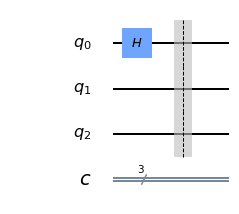

In [ ]:
qc.barrier()
qc.draw('mpl')

Now we apply the quantum teleportation circuit.

In [ ]:
qc.h(1) 
qc.cx(1,2) # Creates entangled Bell Pair b/w qubits 1 and 2
qc.barrier()

# This is where teleportation happens
qc.cx(0,1)
qc.h(0)
qc.barrier()

qc.measure([0, 1], [0, 1])
qc.barrier()

qc.cx(1,2)
qc.cz(0, 2)

qc.measure(2, 2)

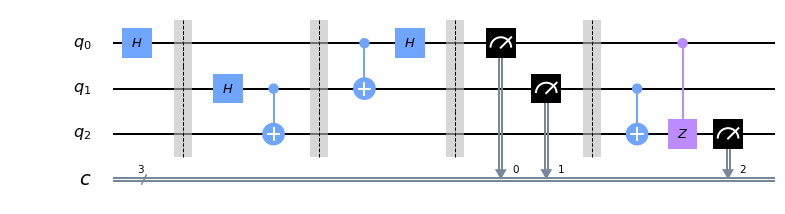

In [ ]:
qc.draw('mpl')

At this point, the qubit qc\[2\] contains the value of qc\[0\] at the first barrier.

Now, we write some code to  either:-

1. Simulate our experiment on this classical computer
2. Run our experiment on IBM-Q

### Simulation

In [ ]:
simulator_qasm = Aer.get_backend('qasm_simulator')
job_qasm = execute(qc, simulator_qasm, shots = 1024)

In [ ]:
print("QASM Simulation job: " + str(job_qasm.status()))

QASM Simulation job: JobStatus.RUNNING


QASM: {'000': 129, '100': 135, '001': 126, '101': 118, '110': 127, '010': 122, '011': 112, '111': 155}


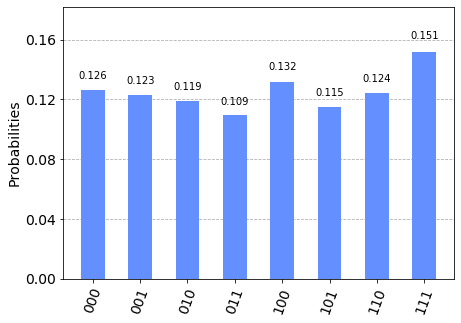

In [ ]:
result_qasm = job_qasm.result()
count = result_qasm.get_counts()

print("QASM: " + str(count))

from qiskit.tools.visualization import plot_histogram

plot_histogram(count)

## Using subcircuits to simplify our circuit

In this section, we'll simplify our circuits using subcircuits, which is a feature of Qiskit.

We make modules for different tasks such as making a bell pair, performing teleportation, measurements, etc.

In [ ]:
def createInitialState():
    # You can edit this
    # Take Alice's qubit to whatever state we want
    # For example, we can create the initial state by applying the Hadamard gate

    initialState = QuantumCircuit(1, name='initial_State')
    initialState.h(0)

In [ ]:
def createBellPair():
    bell_circuit = QuantumCircuit(2, name='create_Bell_Pair')
    bell_circuit.h(0)
    bell_circuit.cx(0,1)
    return bell

def teleportAlice():
    # Teleport Alice's qubit to intermediary qubit
    teleport_Alice_circuit = QuantumCircuit(2, name='teleport_Alice')
    teleport_Alice_circuit.cx(0,1)
    teleport_Alice_circuit.h(0)
    return teleport_Alice_circuit

def measureAlice():
    # Here we measure Alice's qubit
    measure_Alice_circuit = QuantumCircuit(2, 2, name='measure_Alice')
    measure_Alice_circuit.measure([0, 1], [0, 1])
    return measure_Alice_circuit

def teleportBob():
    # Teleport Alice's qubit to intermediary qubit
    teleport_Bob_circuit = QuantumCircuit(3, name='teleport_Bob')
    teleport_Bob_circuit.cx(1,2)
    teleport_Bob_circuit.cz(0,2)
    return teleport_Bob_circuit